# Part II C3 Petrology  -  Practical 20: MORB Global Systematics #
## John Maclennan, Lent 2022 ##


## 1. Practical Set Up: Global Datasets, Simple Coding, Functionality in a Pandemic ##

## 15 minutes ##

### What am I looking at here? ###
This is a Jupyter Notebook, a document in a web browser that you can edit, generate text, and run code (typically Python). You have possibly seen this set-up previously, in the Part II skills course. In this particalur case, to help the code run smoothly, we are doing the processing in the cloud using a tool called Binder. This means that you should be able to access all of the packages required and execute the code independent of the details of the computer that you are using locally - all you need is access to an internet connection and a web browser.

### Online Big Data - Bathymetry and MORB compositions ###
A key feature of modern earth and environmental sciences is that huge observational, experimental and thermodynamic datasets are now available. You need to have the tools to be able to interact with them. In this practical we will look at two datasets - one of [global bathymetry](https://www.gmrt.org/) and the other of [mid-ocean ridge basalt compositions](https://www.earthchem.org/petdb). You can click on the links to understand the data sources. The bathymetric data has a horizontal spatial resolution of 100-500m and there are over 100,000 samples with analyses in the PETDB database.

### GMT for mapping, Pandas for data-tables ###
There are a number of different was to interact with such datasets. In this case, in order to keep the practical self-contained, we will use the [Generic Mapping Tools (GMT)](https://www.generic-mapping-tools.org/) which is now available in Python, to produce maps and examine mid-ocean ridge bathmetry. GMT is widely used in the Earth and Marine Sciences. We will explore the geochemical data using [Pandas](https://pandas.pydata.org/) which allows Python to be used like R (which some of you may also be familiar with). I'll put a couple of cells of code in below, which you should run, in order to import the correct packages and bathymetry data for use in the practical. 


## 2. Loading in, checking and plotting bathymetry data ##

## 15 minutes ##

In [7]:
!pip install ghostscript
!pip install -q condacolab
import condacolab
condacolab.install()
!conda create --name pygmt --channel conda-forge pygmt
!conda activate pygmt
!conda install pygmt

✨🍰✨ Everything looks OK!
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local/envs/pygmt

  added / updated specs:
    - pygmt


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-1_gnu
  blosc              conda-forge/linux-64::blosc-1.21.0-h9c3ff4c_0
  boost-cpp          conda-forge/linux-64::boost-cpp-1.74.0-h6cacc03_7

In [8]:
# Load the PyGMT package. This only needs to be run once
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.5.0
System information:
  python: 3.7.12 (default, Jan 15 2022, 18:48:18)  [GCC 7.5.0]
  executable: /usr/bin/python3.real
  machine: Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Dependency information:
  numpy: 1.21.5
  pandas: 1.3.5
  xarray: 0.18.2
  netCDF4: 1.5.8
  packaging: 21.3
  ghostscript: 9.54.0
  gmt: 6.3.0
GMT library information:
  binary dir: /usr/bin
  cores: 2
  grid layout: rows
  library path: /usr/local/lib/libgmt.so
  padding: 2
  plugin dir: /usr/local/lib/gmt/plugins
  share dir: /usr/local/share
  version: 6.4.0


In [ ]:
# Check that worked OK
#pygmt.show_versions() 

In [9]:
# Load sample grid and point datasets
grid = pygmt.datasets.load_earth_relief() # this is an x-y-z grid of altitude/bathymetry - lo-res to start with...
points = pygmt.datasets.load_ocean_ridge_points() # this is a GMT-provided track of positions of spreading ridge axes


In [10]:
grid # gives you a peek at the beginning and end of the grid file - you can see the height is in metres

<xarray.DataArray 'elevation' (lat: 180, lon: 360)>
array([[ 2999. ,  2997.5,  2995.5, ...,  3003.5,  3002.5,  3000.5],
       [ 3126.5,  3127. ,  3127. , ...,  3125. ,  3125.5,  3126. ],
       [ 3051. ,  3050.5,  3051.5, ...,  3058. ,  3056. ,  3053.5],
       ...,
       [-3888.5, -3884.5, -3885.5, ..., -3897.5, -3894. , -3890.5],
       [-3496. , -3566. , -3612.5, ..., -3214. , -3294.5, -3402. ],
       [-3899. , -3859. , -3812. , ..., -3983. , -3966.5, -3940. ]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:         elevation relative to the geoid
    units:             meters
    vertical_datum:    EMG96
    horizontal_datum:  WGS84

In [11]:
points # peek at beginning and end of the ridge position track

,longitude,latitude
0,-32.2971,37.4118
1,-32.3909,37.1394
2,-32.6448,37.1760
3,-32.7066,37.0349
4,-32.9468,37.0643
...,...,...
4141,-77.6612,-45.7623
4142,-76.6762,-45.6414
4143,-75.8527,-45.5741
4144,-75.7026,-46.0728


In [12]:
# Sample the bathymetry along the world's ocean ridges at specified track points
track = pygmt.grdtrack(points=points, grid=grid, newcolname="bathymetry") 


Next we'll quickly plot a figure using this data, showing a global projection of the data. You should visit the [pygmt](https://www.pygmt.org/latest/) manual pages and look at the information about [projections](https://www.pygmt.org/latest/projections/index.html) and [setting the region](https://www.pygmt.org/latest/tutorials/regions.html) to get a quick feel for what the code below means. Please ask if this does not make sense. 

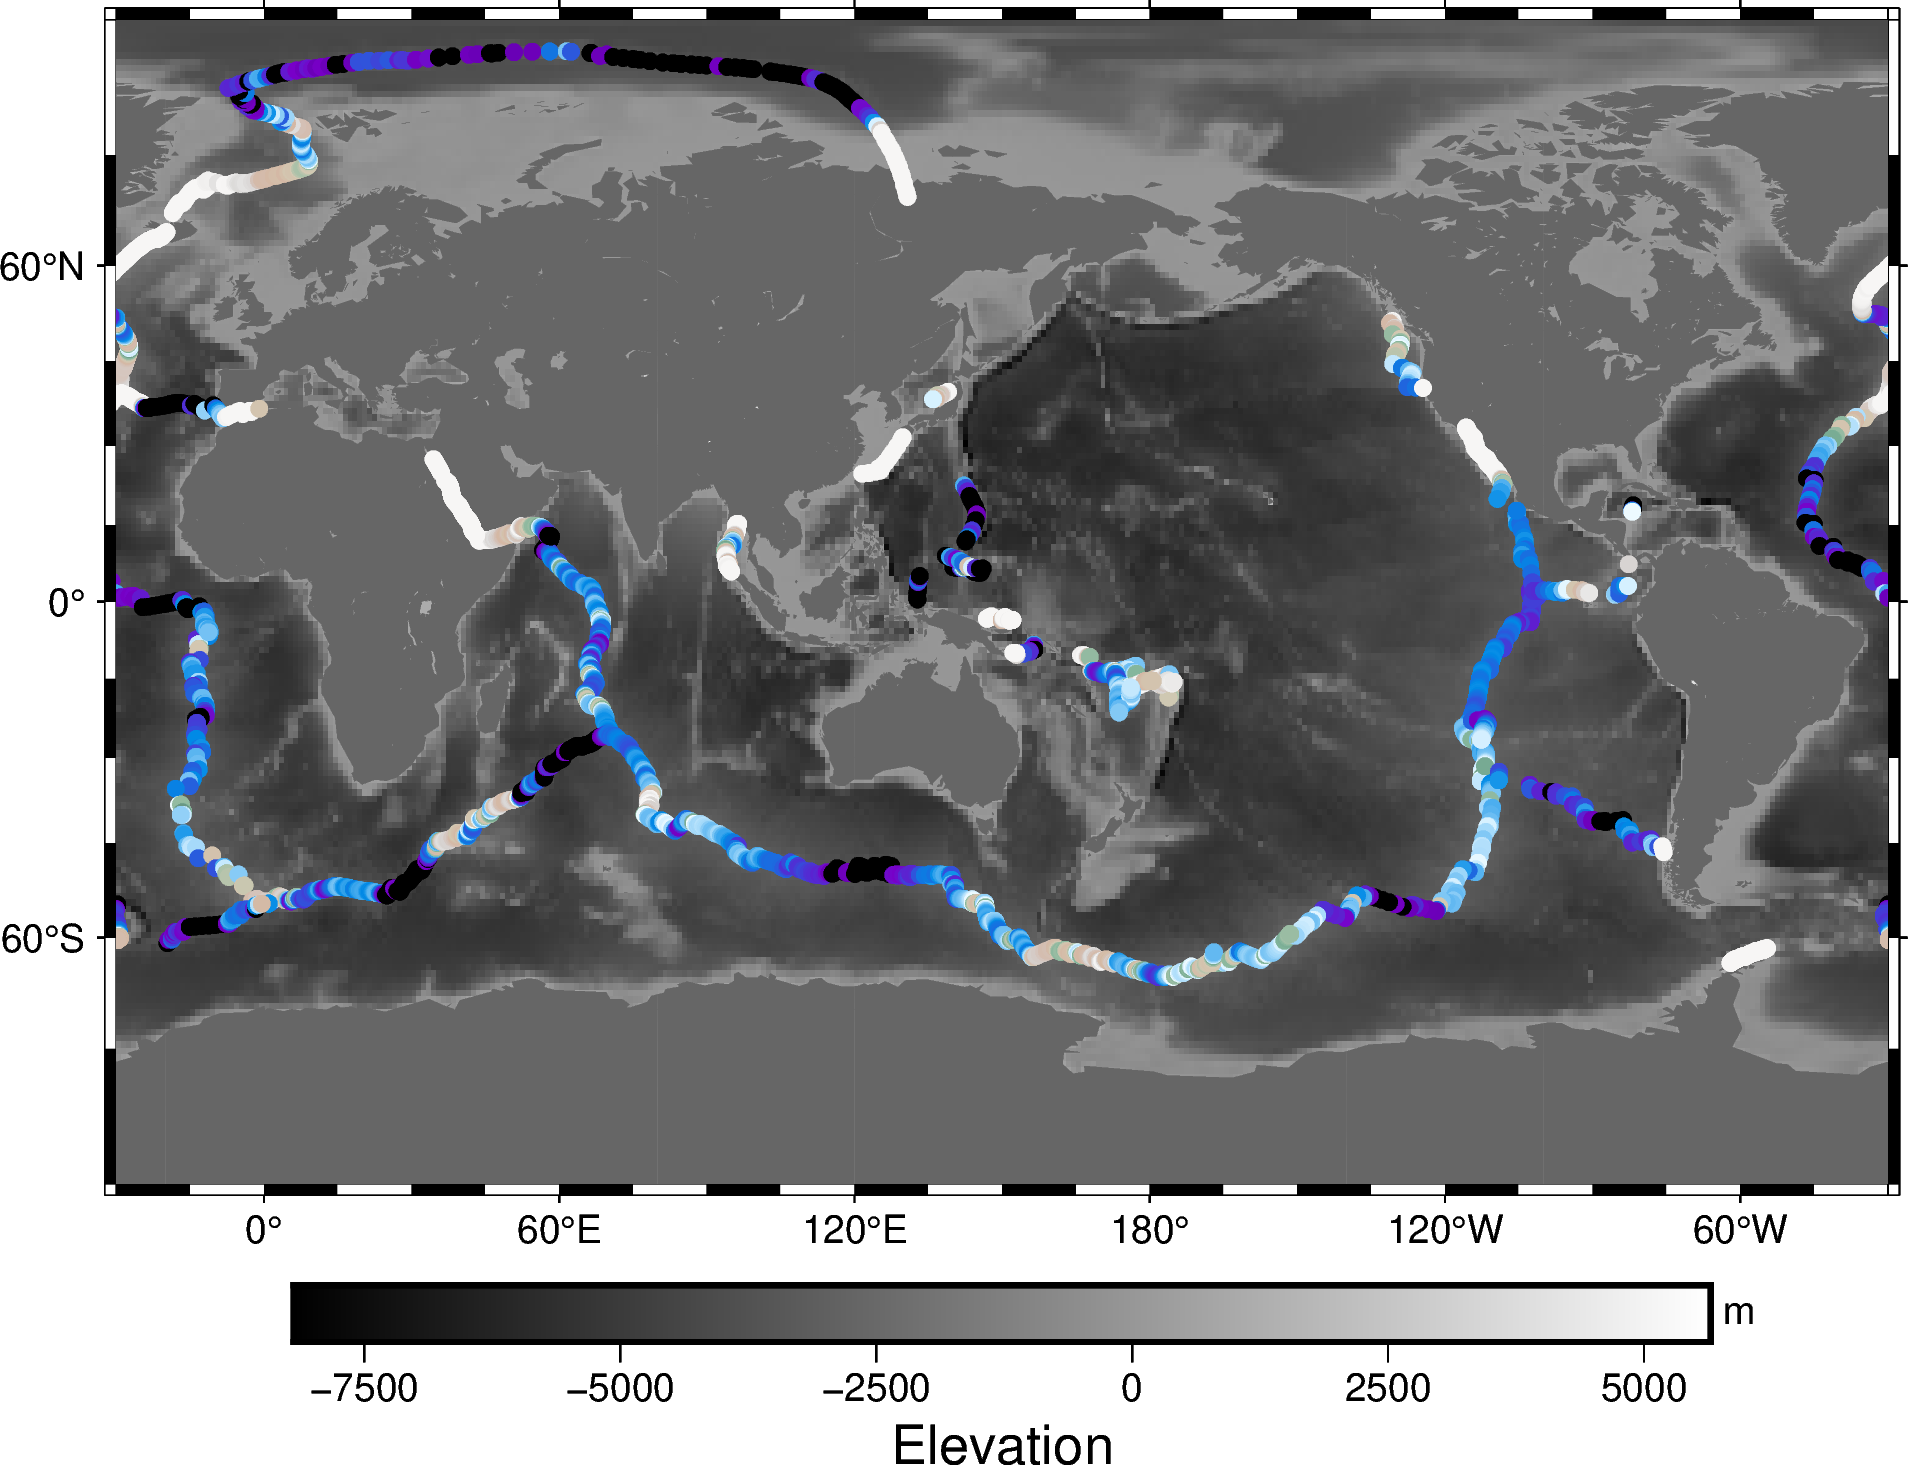

In [13]:
fig = pygmt.Figure() # example taken from pygmt manual pages
# Plot the earth relief grid on Cylindrical Stereographic projection, masking land areas
fig.basemap(region="g", frame=True, projection="Cyl_stere/150/-20/15c") # this sets the projection and the region and the size of the plot (15cm)
fig.grdimage(grid=grid, cmap="gray") # the plots up the ocean bathymetry with a boring gray colour scale
fig.coast(land="#666666")
# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=track.longitude,
    y=track.latitude,
    style="c0.15c",
    cmap="terra",
    color=(track.bathymetry - track.bathymetry.mean()) / track.bathymetry.std(), # normalised deviations for colour 
)
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
fig.show()

In [14]:
fig.savefig("global.png") # if you like the plot this will save it for you

## 3. PETDB - A Petrological Database of Oceanic Basalts ##

## 30 minutes ##

Visit the [PETDB](https://www.earthchem.org/petdb) website and see if you can work out how to download a dataset of rock compositions from the present-day spreading ridges - use the sample map to help. You can also filter for sample type (e.g. volcanic rock) and, later on in the selection process, you can filter for the type of geochemical data that is available. I am happy to demonstrate this PETDB functionality during the practical. I was able to download this to a excel spreadsheet.   

Since we are running this notebook from Binder, I have preloaded a dataset from PETDB which contains the compositions of mafic volcanic rocks from spreading ridges. Lets load this in and check that we can interact with it. 

The __pandas__ package is used to load in a spreadsheet here, so let's first import that.  

In [15]:
import pandas

In [ ]:
#pandas.show_versions()

In [17]:
petdb = pandas.read_excel("https://github.com/John-Maclennan/PartIIC3P20/blob/main/earthchem_download_72807.xlsx?raw=true",header=5) # This is a >3Mb file so takes a little while to load

The `header` statement in the command above tells read_excel which row to start looking for column names. This large file is unwieldy and difficult to look at, but we can inspect the structure my using the following command. 

In [18]:
petdb.head

<bound method NDFrame.head of               SAMPLE ID IGSN EXPEDITION ID        REFERENCES  LATITUDE  \
0               *VG1586  NaN            nr      MELSON, 2003      5.60   
1                *VG968  NaN            nr         ITO, 1980     28.90   
2            078_I5.27N  NaN            nr       COHEN, 1982      5.45   
3      09N039W-UDM-HOST  NaN            nr     SOBOLEV, 1993      9.00   
4                108DR1  NaN            nr  PRINZHOFER, 1989     11.43   
...                 ...  ...           ...               ...       ...   
29987      REVDR04-D03A  NaN       REVDR04    PETERSON, 2017      0.27   
29988      REVDR04-D04E  NaN       REVDR04    PETERSON, 2017      0.19   
29989  REVDR04-D03A-002  NaN       REVDR04    PETERSON, 2017      0.27   
29990      REVDR04-D04A  NaN       REVDR04    PETERSON, 2017      0.19   
29991      REVDR04-D69B  NaN       REVDR04    PETERSON, 2017     -1.45   

       LONGITUDE  LOC PREC  MIN ELEVATION  MAX ELEVATION  TECTONIC SETTING  \
0  

You can see that the column headers that we would like to use are there latitude, longitude, elevation (negative beacuse its depth below sea level) and chemistry given as weight percent oxides.

We can check that the data has loaded in successfully by plotting it up. I normally use Matplotlib for plotting in Python, but since we have installed GMT here we might as well use it.

__Q3.1 Change the code below to show the full range of the data and to give more useful axis labels.__

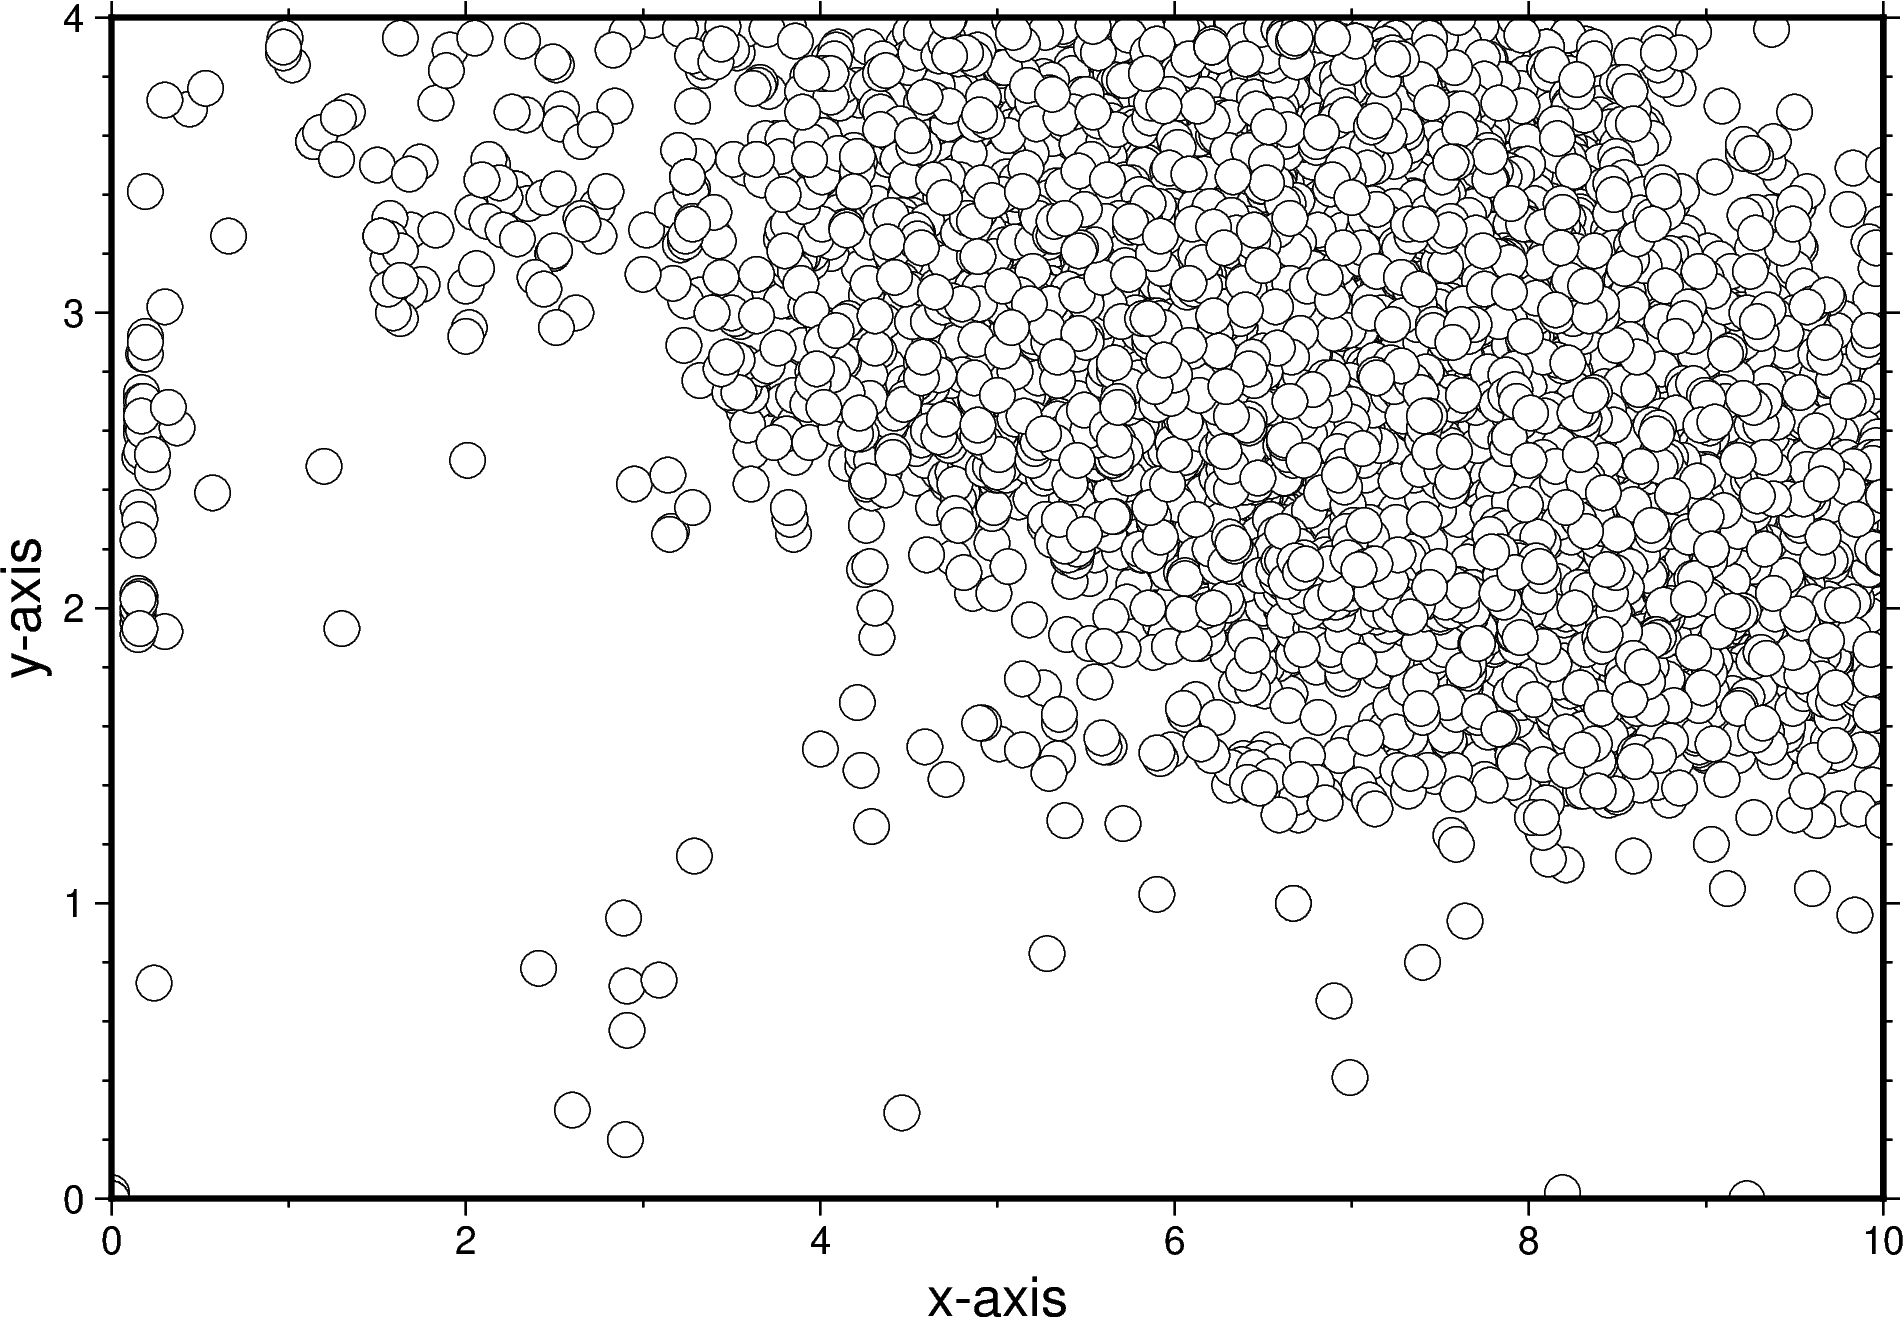

In [19]:
fig = pygmt.Figure()
fig.plot(
    x=petdb.MGO, y=petdb.NA2O, style="c0.3c", color="white", pen="black",
    # ``region`` sets the x and y ranges or the Cartesian figure.
    region=[0, 10, 0, 4],
    projection="X15c/10c",
    # ``WSne`` is passed to ``frame`` to put axis labels only on the left and bottom axes.
    frame=["af", "WSne", "x+lx-axis", "y+ly-axis"],
)

fig.show()


In [20]:
# Filter for basalt compositions with known locations
## PAY ATTENTION you'll need to use something like this to filter for location in a few minutes....
petbas = petdb[(petdb.MGO > 5.0) & (petdb.NA2O > 0.) & (pandas.notnull(petdb.LATITUDE)) & (pandas.notnull(petdb.LONGITUDE))]

In [21]:
petbas.head

<bound method NDFrame.head of               SAMPLE ID IGSN EXPEDITION ID        REFERENCES  LATITUDE  \
0               *VG1586  NaN            nr      MELSON, 2003      5.60   
2            078_I5.27N  NaN            nr       COHEN, 1982      5.45   
3      09N039W-UDM-HOST  NaN            nr     SOBOLEV, 1993      9.00   
4                108DR1  NaN            nr  PRINZHOFER, 1989     11.43   
5                108DR4  NaN            nr  PRINZHOFER, 1989     13.00   
...                 ...  ...           ...               ...       ...   
29986   SON0158-068-004  NaN       SON0158    PETERSON, 2017      0.86   
29987      REVDR04-D03A  NaN       REVDR04    PETERSON, 2017      0.27   
29988      REVDR04-D04E  NaN       REVDR04    PETERSON, 2017      0.19   
29989  REVDR04-D03A-002  NaN       REVDR04    PETERSON, 2017      0.27   
29991      REVDR04-D69B  NaN       REVDR04    PETERSON, 2017     -1.45   

       LONGITUDE  LOC PREC  MIN ELEVATION  MAX ELEVATION  TECTONIC SETTING  \
0  

__Q3.2 Adapt the plot below to show a useful map of the variation in the Na<sub>2</sub>O content of MORB from the PetDB database.__ To do this, you will need to take a look at the manual pages, or at least think about the script, that is used for the plotting. A couple of useful points will be to try to figure out the best range for the colour-scale which is created by the `makecpt` command. Also, in the `plot` command you should make sure that the Na column data is being used. You can adjust the positioning of the central longitude in the projection in `basemap` too. 

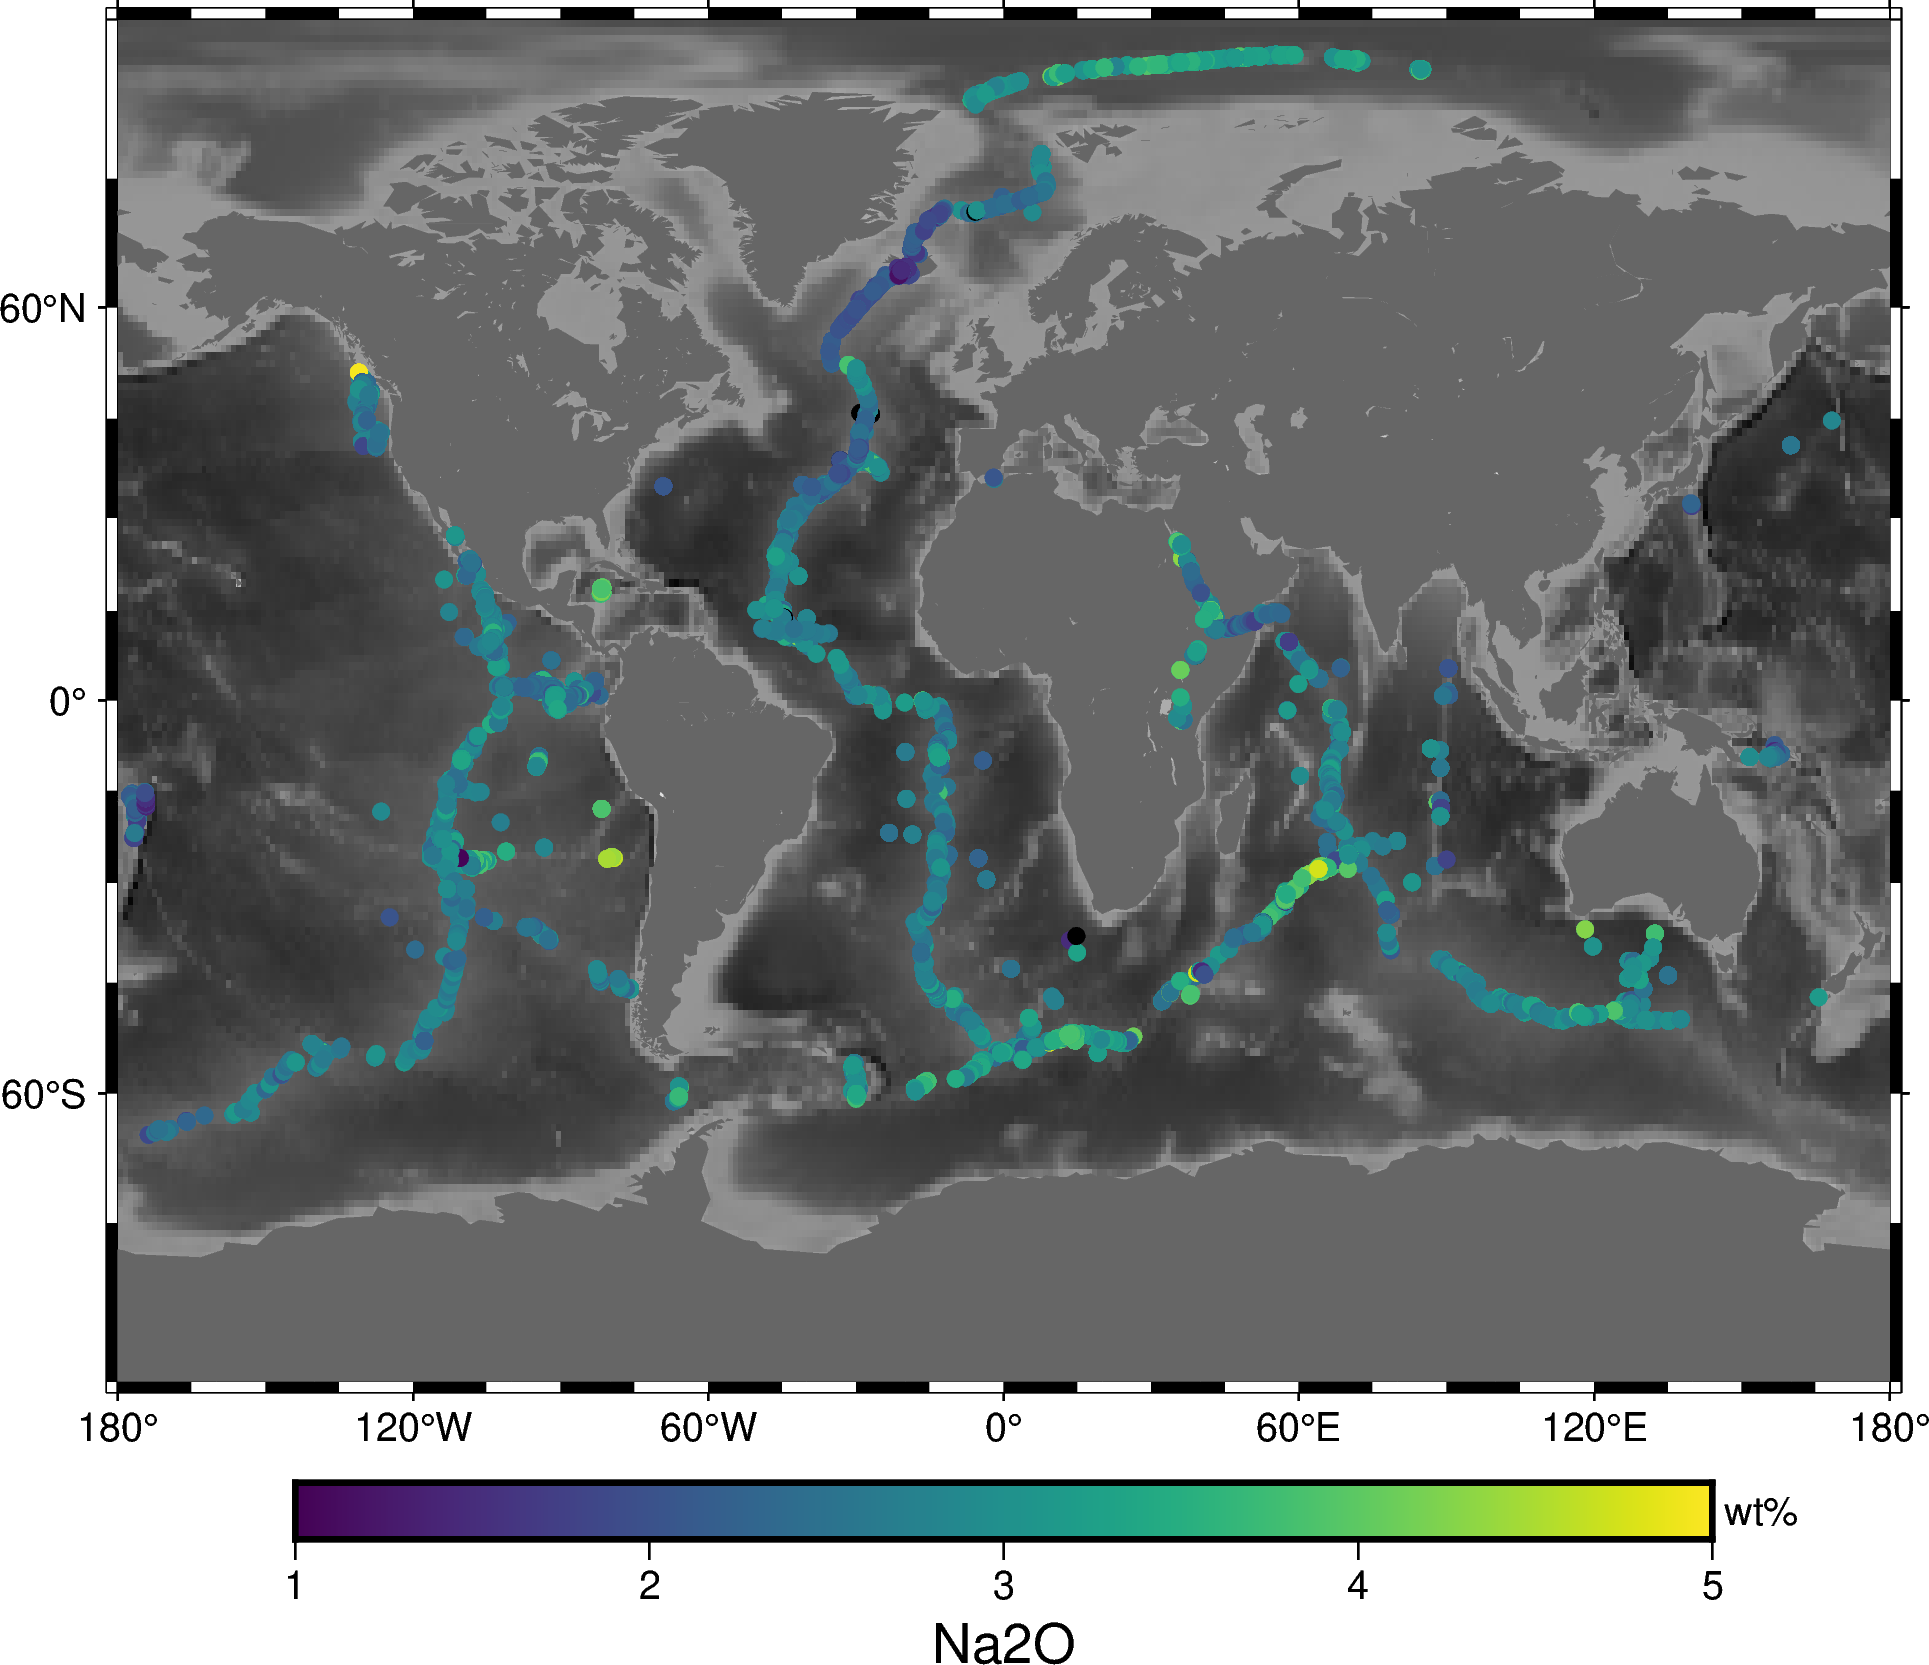

In [22]:
fig = pygmt.Figure() # example taken from pygmt manual pages
# Plot the earth relief grid on Cylindrical Stereographic projection, masking land areas
fig.basemap(region="g", frame=True, projection="Cyl_stere/0/45/15c") # this sets the projection and the region and the size of the plot (15cm)
fig.grdimage(grid=grid, cmap="gray") # the plots up the ocean bathymetry with a boring gray colour scale
fig.coast(land="#666666")
pygmt.makecpt(cmap="viridis", series=[1., 5.], background = "i") #petbas.NA2O.max()
# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=petbas.LONGITUDE,
    y=petbas.LATITUDE,
    style="c0.15c",
    cmap=True,
    color=petbas.NA2O, # normalised deviations for colour 
)
fig.colorbar(frame=["a1.0", "x+lNa2O", "y+lwt%"])
fig.show()

## 4. Controls on the Na<sub>2</sub>O contents of MORB ##

## 30 minutes ##

__Q4.1 Given the patterns that you can observe in your last two plots, comment on the main controls on the Na<sub>2</sub>O contents of MORB__

_Double click on the cell and write answer here_

These relationships between the major element composition of MORB and geophysical indicators of the extent of melting (such as crustal thickness or depth of seafloor at the spreading ridge axis) were used by Charlie Langmuir and co-workers to argue for the presence of a global array in MORB composition that is controlled by mantle properties (e.g. [Klein & Langmuir, JGR, 1987](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JB092iB08p08089)).

In order to isolate chemical variations associated with mantle, rather than crustal, processes these authors devised a chemical property known as Na<sub>8</sub>. Take a look at their Figure 1a and the surrounding text to see how this property is defined and used. 

__Q4.2 Briefly describe why comparison of Na<sub>8</sub> between different parts of the spreading ridge system should provide a clearer picture of mantle melting variations than the use of Na<sub>2</sub>O from above.__

_Write your answer here._

Now, between us, we are going to look at a number of individual segments of spreading centres. Here is a table showing a few choice localities. 

| Segment Name |	Longitude W |Longitude E | Latitude S | Latitude N | Crustal Thickness (km)| Axial Depth (m) | Na<sub>8</sub> |
|  :-:         | :-:            | :-:        | :-:        | :-:        | :-:                   | :-: | :-: |
| Reykjanes Example | -26.5 | -24.5 | 62.0 | 63.0 | 12 | 600 | 1.9 | 
| EPRR10 |	-104.4 |	-104.2 |	9.1 | 	10.1	| 6 | ? | ? |
| JUAN8 |	-129.5	| -128.9	| 46.54	| 47.5	| 7 | ? | ? |
| GALA6	| -97.8	| -96.5	| 2.1	| 2.2	| 5.5 |? | ? |
| GALA11 |	-92.1 |	-90.8 |	1.85 |	2.15 |	8 |? | ? |
| MARR23 |	-18.4 |	-17.6 |	67.9 |	68.9 |	9.5 |? | ? |
| MARR24 |	-18.8 |	-18.5 |	66.9 |	67.9 |	12 |? | ? |
| MARR86 |	-32.4 |	-32.2 |	37 |	37.5 |	6 |? | ? |
| SWIR67SWIR66 |	68 |	69.9 |	-26.4 |	-25.6 |	3.5 |? | ? |
| GAKK15 |	0 |	2.8 |	84.1 |	84.5 |	4 |? | ? |
| SEIR40 |	100.2 |	101.4 |	-47.7 |	-47.2 |	6 |? | ? |
| SEIR56SEIR57 | 116.5 | 117.1 | -49.4 | -49.2	|4 |? | ? |

I will assign you each a segment to investigate. You should discuss your approach with your neighbours. 

As an example, we'll start off looking at the Reykjanes Ridge, just to the south of Iceland. We're going to make one plot to help us estimate the axial depth (mean bathymetry at the ridge axis) and also another to estimate Na<sub>8</sub> for the segment.


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief at 01x01 arc minutes reduced by Gaussian Cartesian filtering (1.9 km fullwidth) [Sandwell et al., 2022].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (earth_relief_01m_p): N60W030


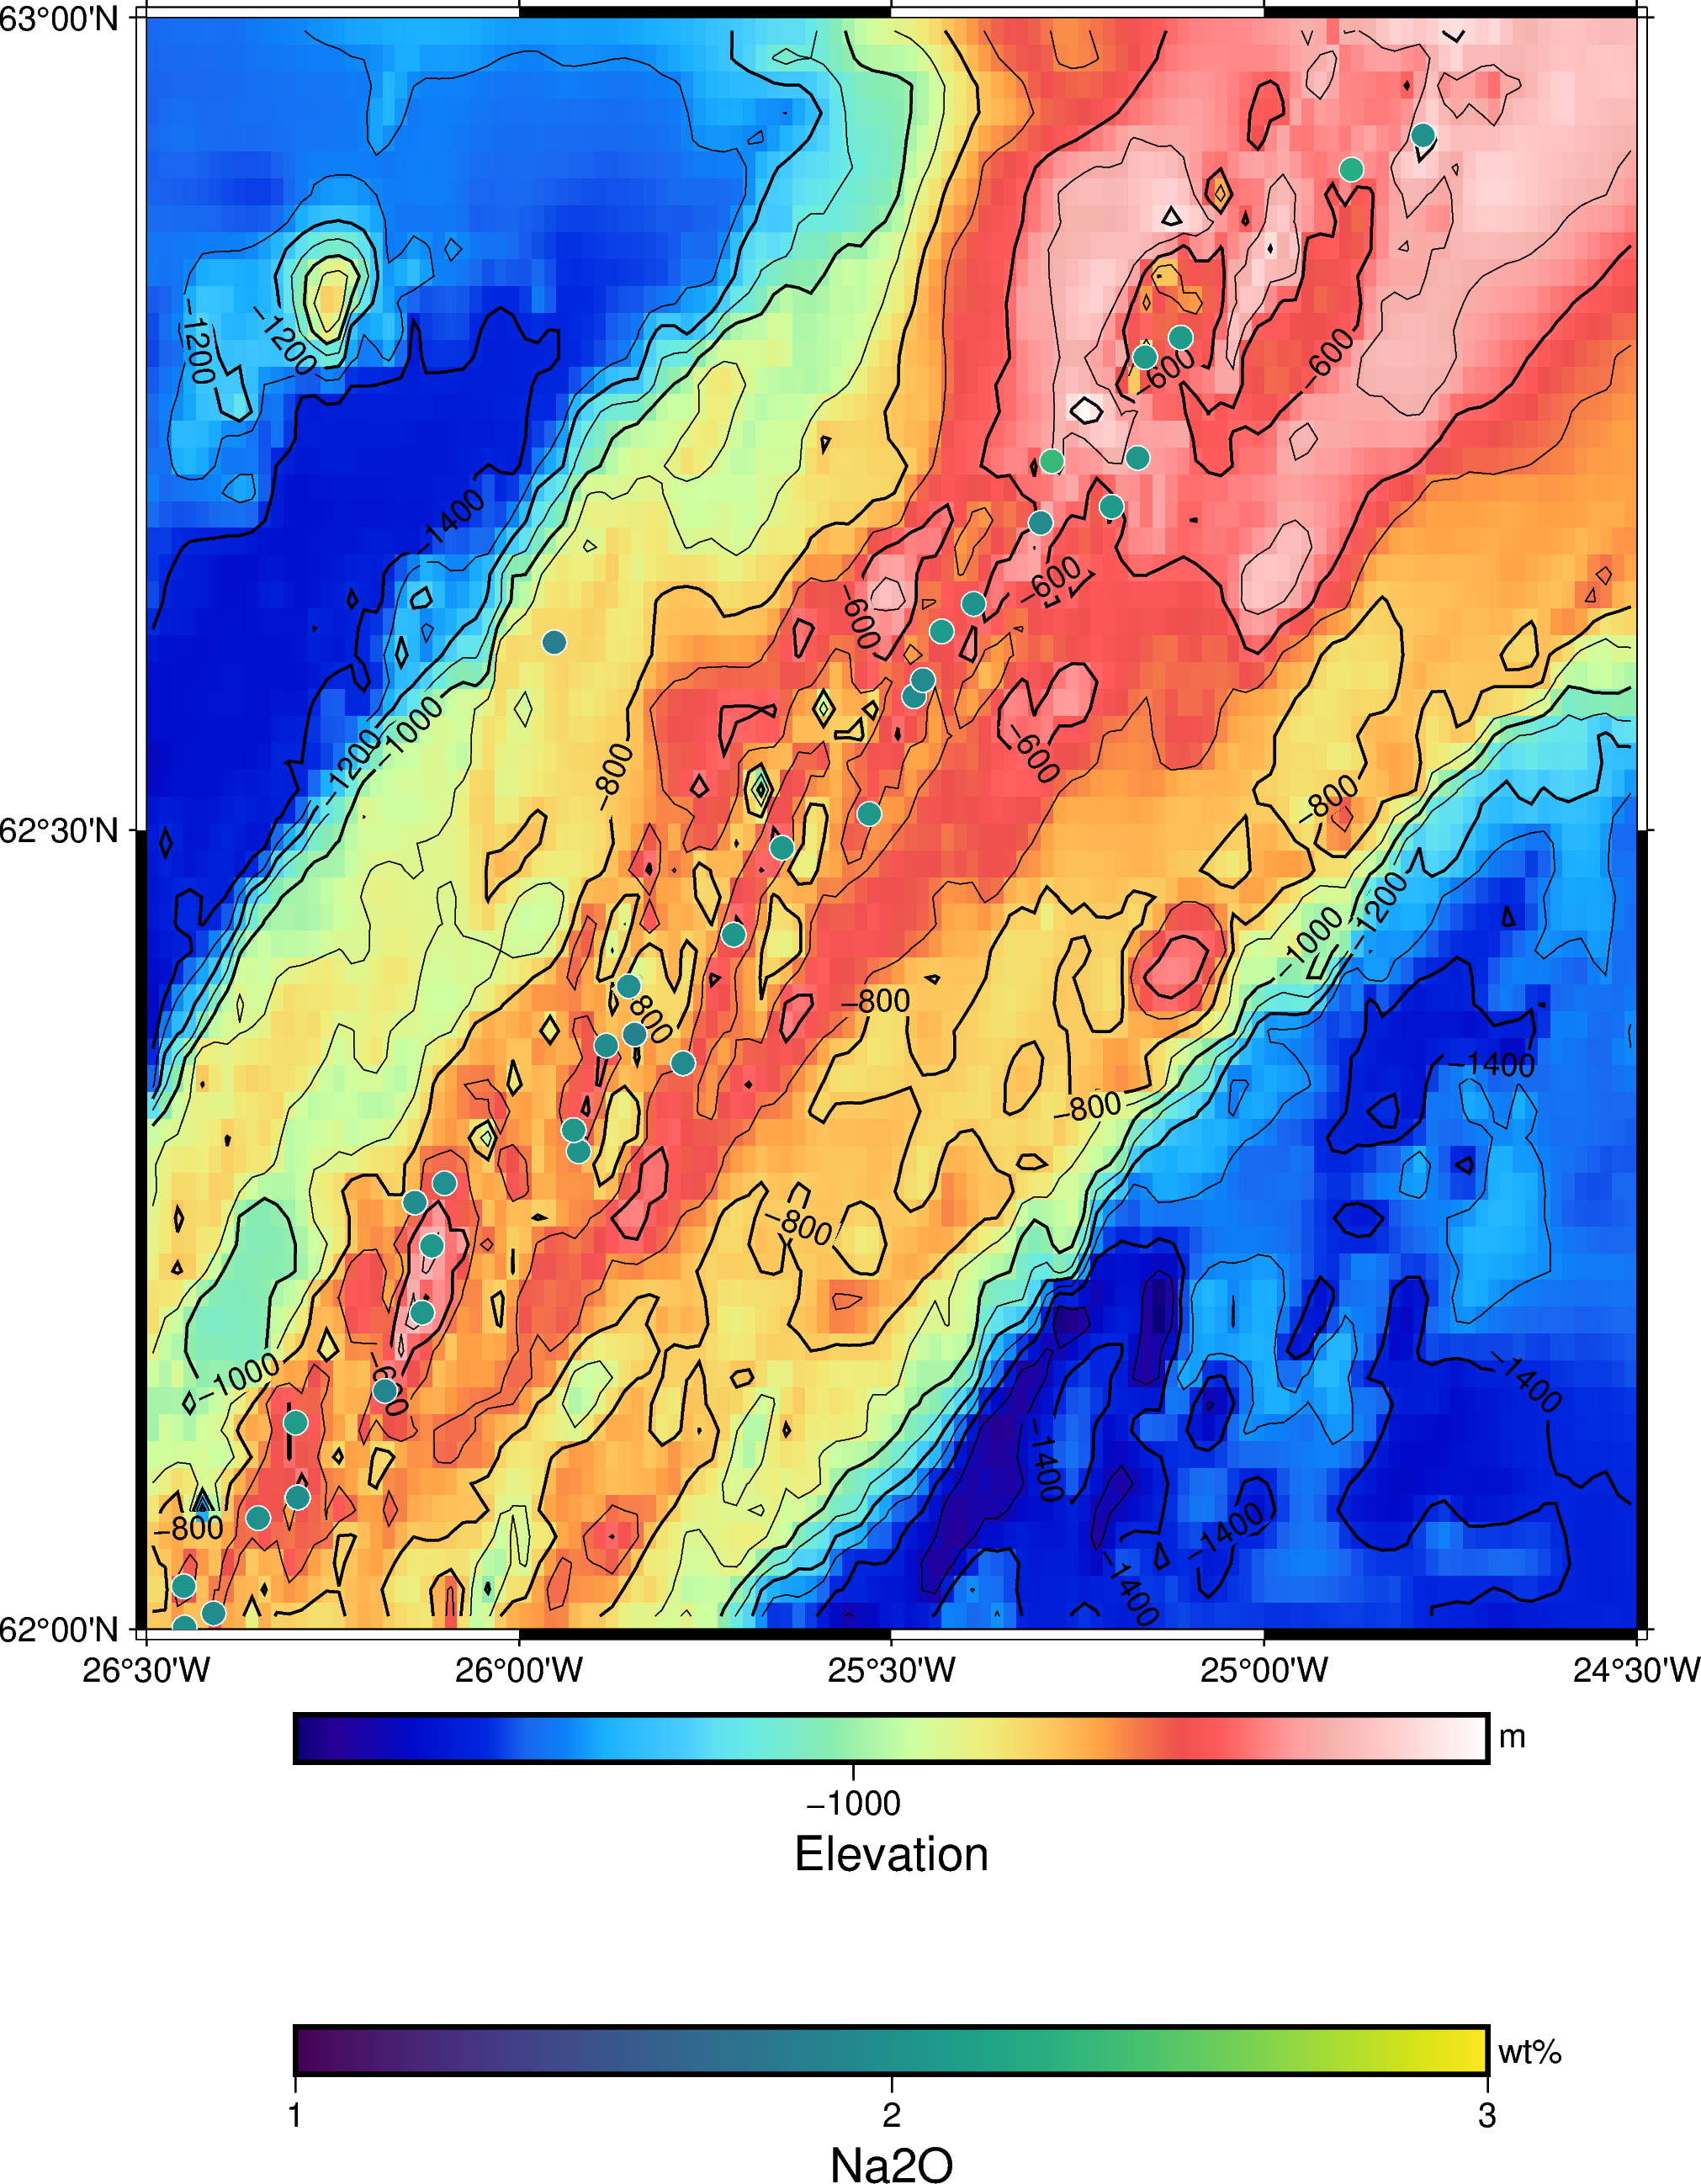

In [23]:
## first of all, make another data grid using a subset of the global data. 
## The region defines the longitude and latitude bounds in the order WESN
## The resolution is 01m - which is 1 arcminute grid spacing. This should be sufficient 
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[-26.5, -24.5, 62, 63])

## next, we want to subset the petdb dataset to only include samples from the region.
## In PetDB, longitude goes from -180 to +180.  
petsam = petbas[(petbas.LONGITUDE > -26.5) & (petbas.LONGITUDE < -24.5) & (petbas.LATITUDE > 62.) & (petbas.LATITUDE < 63.)]


fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="haxby") # haxby is a colorscale that is OK for oceans
fig.grdcontour(grid=grid) # plot up contours
fig.colorbar(frame=["a1000", "x+lElevation", "y+lm"])
pygmt.makecpt(cmap="viridis", series=[1., 3.], background = "i") # color scale for Na2O - change series limits
# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=petsam.LONGITUDE,
    y=petsam.LATITUDE,
    style="c0.25c",
    pen="white",
    cmap=True,
    color=petsam.NA2O, # sill circle according color-scale
)
fig.colorbar(frame=["a1.0", "x+lNa2O", "y+lwt%"],position="JBC+o0c/4c")
fig.show()


So, this has generated a contoured and coloured bathymetry chart of the region of interest, along with the position of available basalt samples, these colour-coded by their Na<sub>2</sub>O contents. You can put the map in context by comparing to a global plot from GMT, the [GMRT website](https://www.gmrt.org/) or even Google Earth. 

You may also plot the sample compositional data in order to estimate Na<sub>8</sub>. You can do this by eye, but you might also explore more objective quantitative methods based on linear regression or taking means or modes across ranges of MgO. 

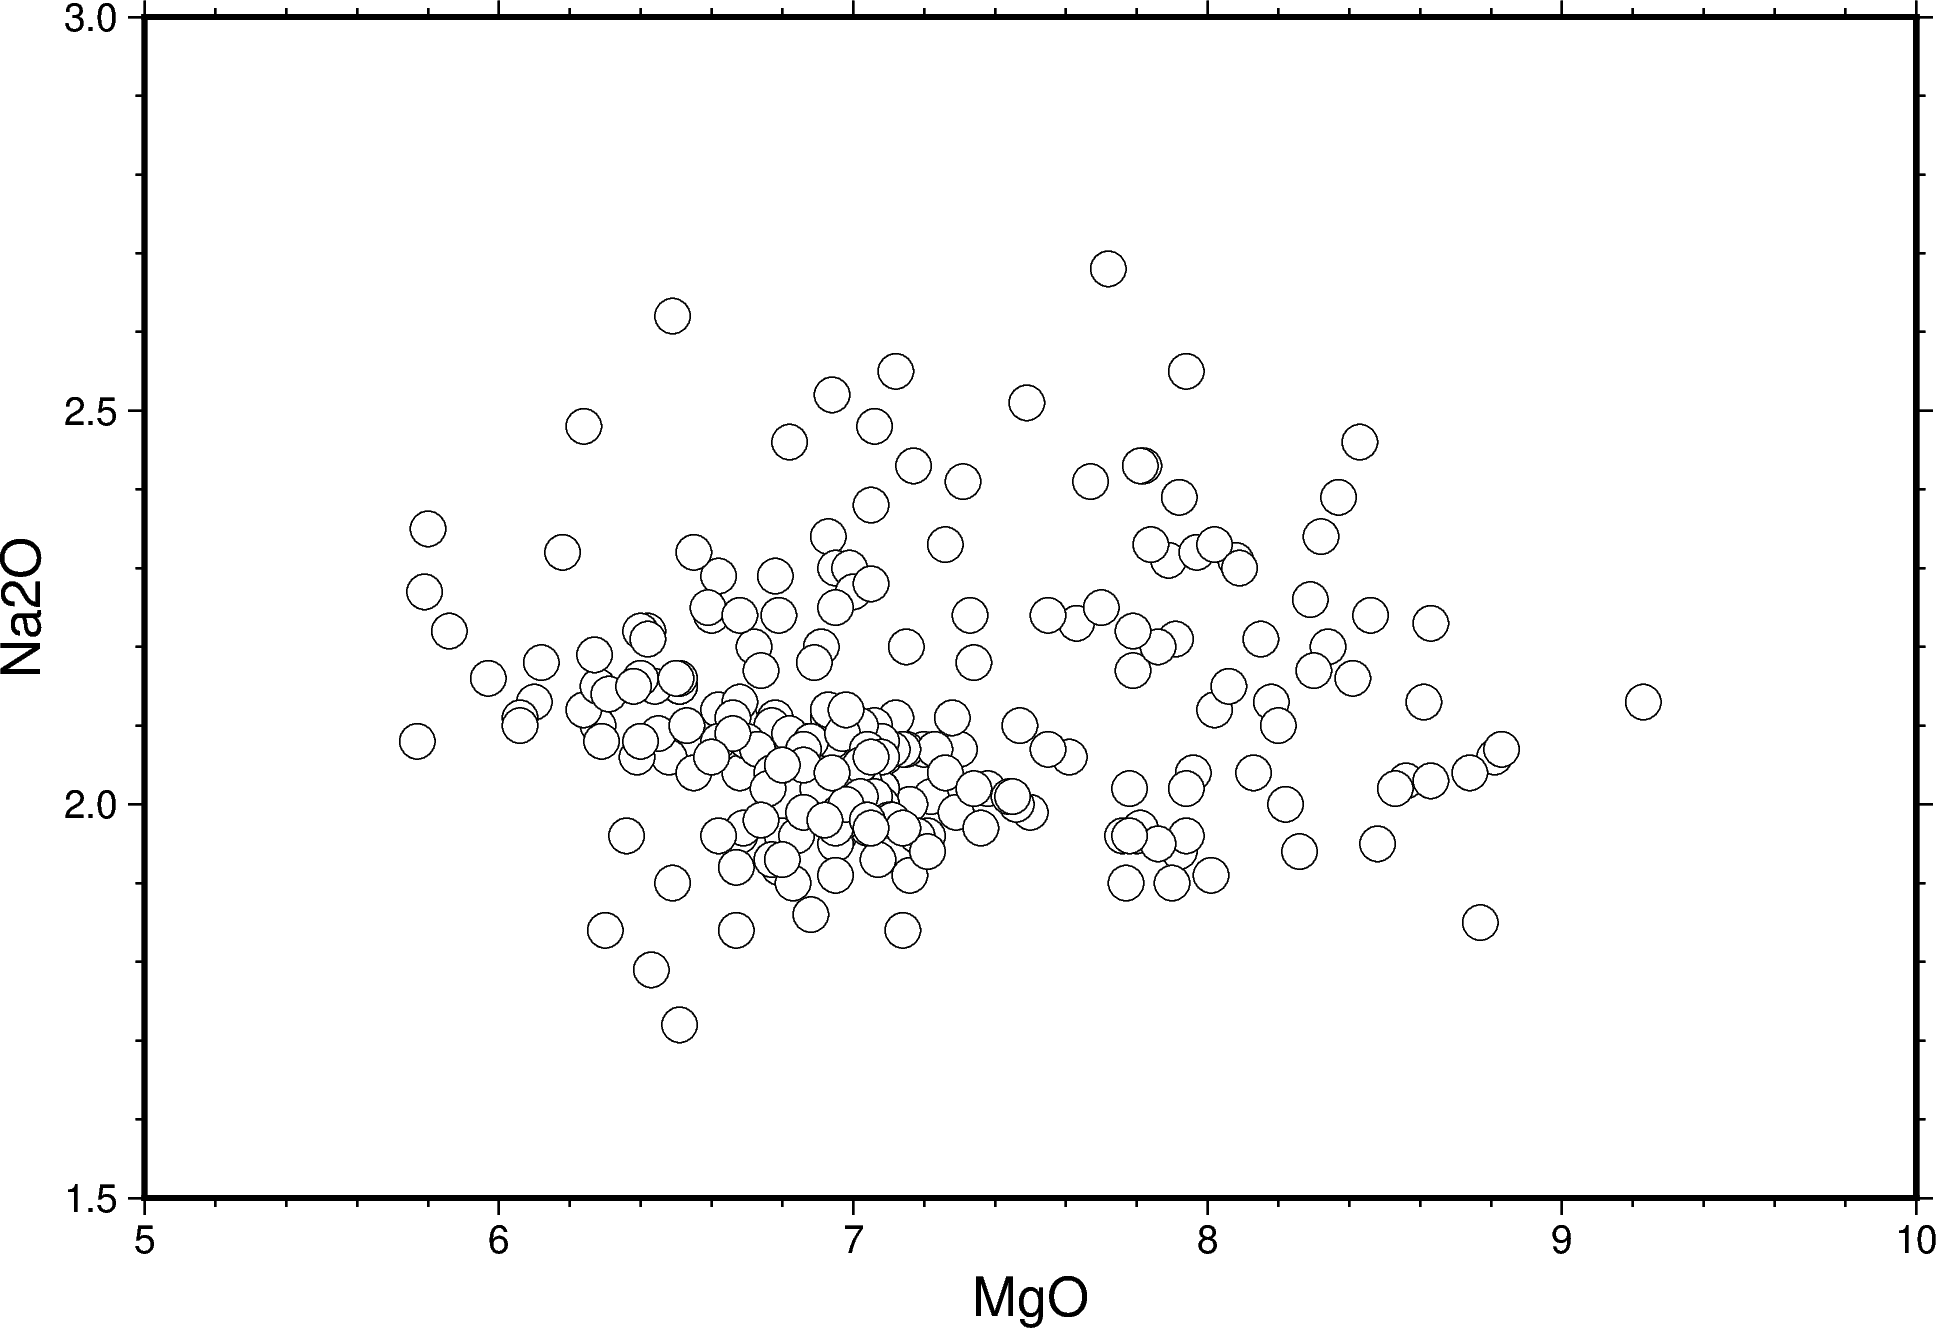

In [24]:
fig = pygmt.Figure()
fig.plot(
    x=petsam.MGO, y=petsam.NA2O, style="c0.3c", color="white", pen="black",
    # ``region`` sets the x and y ranges or the Cartesian figure.
    region=[5, 10, 1.5, 3.0],
    projection="X15c/10c",
    # ``WSne`` is passed to ``frame`` to put axis labels only on the left and bottom axes.
    frame=["af", "WSne", "x+lMgO", "y+lNa2O"],
)

fig.show()

In the case of this portion of the Reykjanes Ridge, I estimate an axial depth of 600 m and Na<sub>8</sub> of 1.9. You can see this value in the table. 

__Q4.3 Copy the relevant cells above and paste below here. Edit these in order to estimate axial depth and Na<sub>8</sub> in your region.__

__Q4.4 Now, as a group, lets combine our results in order to make a global array of Na<sub>8</sub> and axial depth.__ 

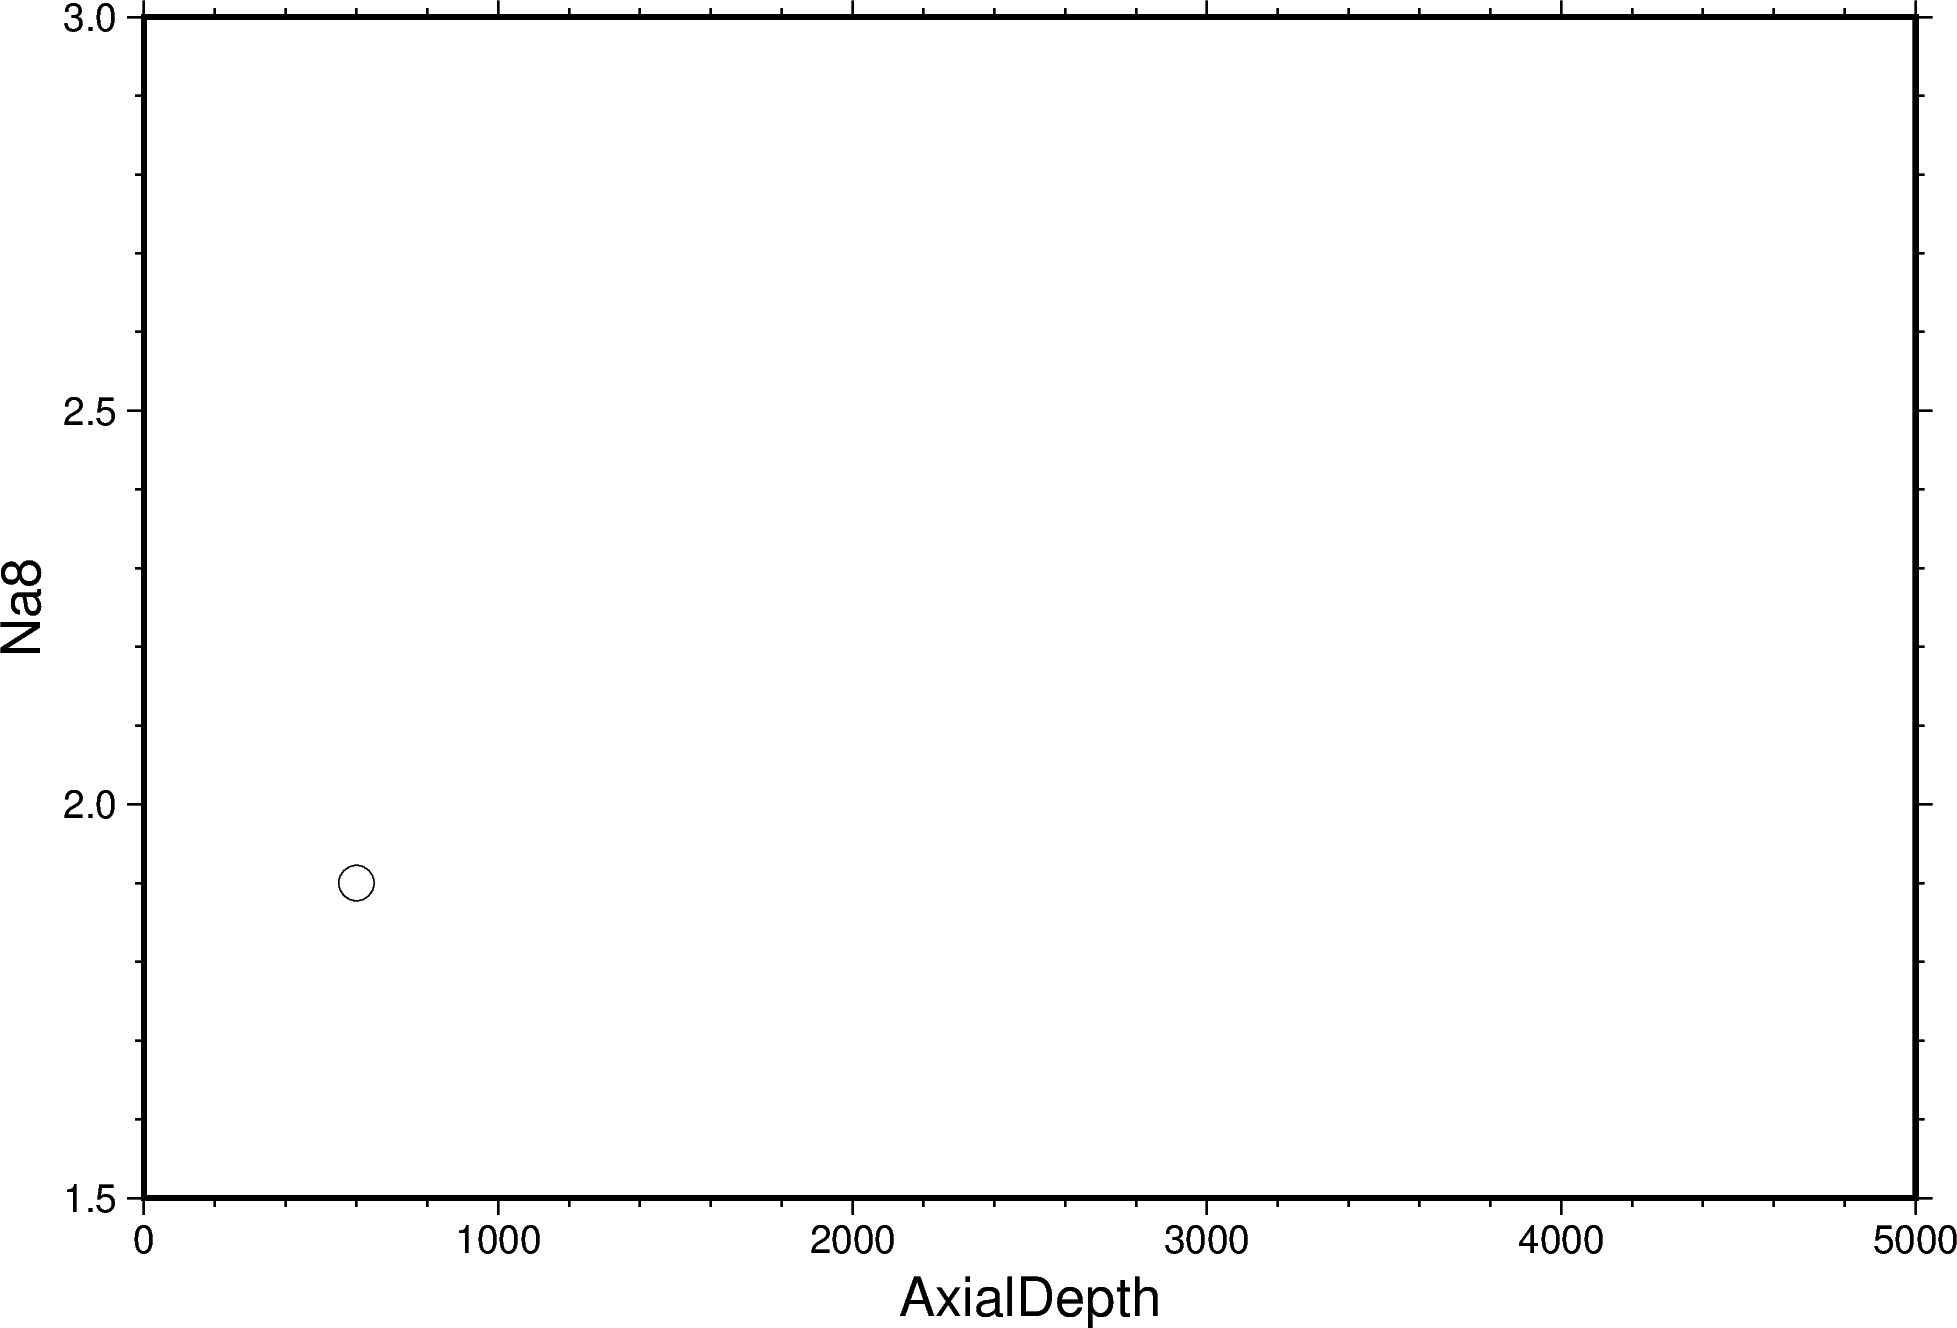

In [25]:
fig = pygmt.Figure()
x = [600.,0.]
y = [1.9,0.]
fig.plot(
    x=x, y=y, style="c0.3c", color="white", pen="black",
    # ``region`` sets the x and y ranges or the Cartesian figure.
    region=[0, 5000, 1.5, 3.0],
    projection="X15c/10c",
    # ``WSne`` is passed to ``frame`` to put axis labels only on the left and bottom axes.
    frame=["af", "WSne", "x+lAxialDepth", "y+lNa8"],
)

fig.show()

We should compare this compilation with the more thorough effort from [Gale and Langmuir, 2014](https://academic.oup.com/view-large/figure/82006958/egu017f6p.png).

## 5. Simple Modelling of the Global Array ##

## 30 minutes ##

__Q5.1 How might variations in mantle $T_p$ account for the sense of the global correlation between Na<sub>8</sub>, crustal thickness and ridge depth?__

_Answer here_

In the lecture handout, you should be able to find a diagram which shows the expected melt fraction as a function of depth, $X(z)$ depending on the mantle potential temperature. 

__Q5.2 Given the relationship between crustal thickness and $X(z)$ provided in the lecture, fill in the $X_{max}$, $z_{max}$ and $t_{c}$ columns in the table below__

$X_{max}$ is the maximum extent of melting, at the top of the melting region, and $z_{max}$ is the depth of the bottom of the melting region. 

| $T_p$(&deg;C) |$X_{max}$| $z_{max}$(km) | $t_{c}$(km) | $C_{L}$(wt%) |
|---|---|---|---|---|
| 1200 | 0.12 | 20 | 1.2 | ? |
| 1300 | ? | ? | ? | ? |
| 1400 | ? | ? | ? | ? |
| 1500 | ? | ? | ? | ? |
| 1600 | 0.38 | 150 | 30.0 | ? |


__Q5.3	What range of mantle potential temperatures are required to match the observed global variation in oceanic crustal thicknesses? (It is worth bearing in mind that Iceland, with a crustal thickness of >20 km, is not included in your dataset).__

_Answer here_

Variation in the Na contents of mantle melts under mid-ocean ridges can also be linked to the extent of mantle melting. If we use a highly simplified melting model, the Na<sub>2</sub>O content of the mantle melts can be calculated from the following expression for accumulated fractional melts which was developed by [Plank et al., 1995](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/95JB01148), a paper which is worth a look.

$$
C_L = \frac{2C_0}{X_{max}} \left[ 1 + \frac{D \left[ (1 - X_{max})^{((1/D) - 1))} -1 \right]}{X_{max}(D+1)} \right]
$$

In this case, $C_L$ is the liquid composition, $C_0$ is the mantle source composition (you can try 0.3 wt% for Na<sub>2</sub>O and $D$, the partition coefficient during melting (try a constant of 0.01 for Na).

__Q5.4 Calculate this expression for one Tp and insert this value into the final column of the table a couple of cells above.__

_You might want to make a cell for code below, and split the calculation up into easy-to-follow stages_


In the limit $X_{max} >> D$ this equation can be effectively approximated by setting the value of the expression inside the big square brackets to 1. Check this approximation. If it looks good, use this to quickly estimate $C_L$ for the other $T_p$ and complete the table. 

__Q5.5 What range in mantle potential temperatures are required to account for the observed global variation in Na8 in our dataset?__

_Answer here_

__Q5.6 Are the estimates of $T_p$ variation from Q5.3 and Q5.5 consistent with each other? What crucial assumptions involved in this activity might be worth examining in further detail?__

_Answer here_

Please take a look at [Gale et al., 2014](https://academic.oup.com/petrology/article/55/6/1051/1523143?login=true) and [Plank et al., 1995](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/95JB01148) to gain a fuller understanding of the nature and origin of the global correlation between MORB compositions and oceanic crustal thicknesses.



